<a href="https://colab.research.google.com/github/smo216/Machine-Learning-Project/blob/master/Machine_Learning_Final_Project_Sliced_Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load multiple data
"""Utilize histogram matching to normalize images? https://scikit-image.org/docs/stable/auto_examples/transform/plot_histogram_matching.html#sphx-glr-auto-examples-transform-plot-histogram-matching-py"""
## For Image portion

from google.colab import drive
drive.mount('/content/gdrive')
from PIL import Image
from pylab import *
# importing os module 
import os 
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
from skimage.io import imread_collection
from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import histogram
import skimage
import pandas as pd
from pandas import read_csv
from skimage.transform import rescale, resize, downscale_local_mean

Comppath="//content//gdrive//My Drive//PhD casting project//Summary files//Compositions.csv"

SUMDAT=pd.read_csv(Comppath)
#print(SUMDAT)


#path="//content//gdrive//My Drive//PhD SEM Images//UAB//HP-14"
#path6="//content//gdrive//My Drive//PhD Image Processing//Python HP//HP-6-Test"
#path="//content//gdrive//My Drive//PhD Image Processing//Python HP//HP-17-Test"
#os.chdir(path6)
#col6=imread_collection('*.tif') #grab all files with .tif format
#print(col6)
#L6=len(col6)
#scaleim6=array(col6[:])
#cropim6=scaleim6[:,0:4095,:] #crop array to remove scalebar
#print(scaleim6)



#path17="//content//gdrive//My Drive//PhD Image Processing//Python HP//HP-17-Test"
#os.chdir(path17)
#col17=imread_collection('*.tif') #grab all files with .tif format
#print(col17)
#L17=len(col17)
#scaleim17=array(col17[:])
#cropim17=scaleim17[:,0:4095,:] #crop array to remove scalebar


"""#img = imread(img_path, plugin='pil')
io.use_plugin('pil')
path17slice="//content//gdrive//My Drive//PhD Image Processing//Python HP//HP-17-Test//Slice"
os.chdir(path17slice)
col17slice=imread_collection('*.tif', plugin='pil') #grab all files with .tif format
#print(col17)
L17=len(col17slice)
sliceim17=array(col17slice[:])
#cropim17=scaleim17[:,0:4095,:] #crop array to remove scalebar
"""

from PIL import Image
from skimage import io
train_data_path="//content//gdrive//My Drive//PhD Image Processing//Python HP//HP-16-Test//Slice"
os.chdir(train_data_path)
#io.use_plugin('pil')
images = os.listdir(train_data_path)
print(len(images))
col16slice=[]
col16slice=io.imread_collection('*.png') #grab all files with .png format
#print((col16slice))
L=len(col16slice)
imdat=array(col16slice[:])
#for image_name in images:
#    img = io.imread(os.path.join(train_data_path, image_name),plugin='pil')


#print(len(img))


#print(scaleim17)
#HP6DAT=SUMDAT.loc[17,:] #grab composition for HP-6
#HP6DAT=HP6DAT.transpose()
#print(HP6DAT)

#cropim=np.append(cropim6,cropim17,axis=0)
#print(cropim)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
2308


In [0]:
#print(len(img))
print(len(images))
print(len(imdat))

2308
2304


In [0]:
"""Split dataset into Test/Train"""
print(type(imdat))

#plt.imshow(cropdcol1[6,:,:], cmap=plt.cm.gray)
imdat.shape

split=round(L*.7) #70% of dataset for training vs testing
train_dataset,test_dataset =imdat[:split,:,:],imdat[split:,:,:]
#print(train)

train_dataset.shape

test_dataset.shape

nsamples, nx, ny = imdat.shape
d2_imdat = imdat.reshape((nsamples,nx*ny))

#now what?

<class 'numpy.ndarray'>


Extracting the top 2000 eigenfaces from 2304 faces
done in 137.726s
Projecting the input data on the eigenfaces orthonormal basis
done in 10.462s


Text(0, 0.5, 'cumulative variance')

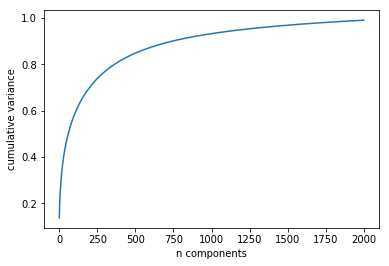

In [0]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction

n_components = 2000

n_samples, h, w = imdat.shape

nsamples2, nx, ny = train_dataset.shape
d2_train_dataset = train_dataset.reshape((nsamples2,nx*ny))


X_train=d2_imdat#d2_train_dataset

nsamples1, nx1, ny1 = test_dataset.shape
d2_test_dataset = test_dataset.reshape((nsamples1,nx1*ny1))

X_test=d2_test_dataset

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

from sklearn.decomposition import PCA
#model = PCA(100, svd_solver='randomized').fit(faces.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')


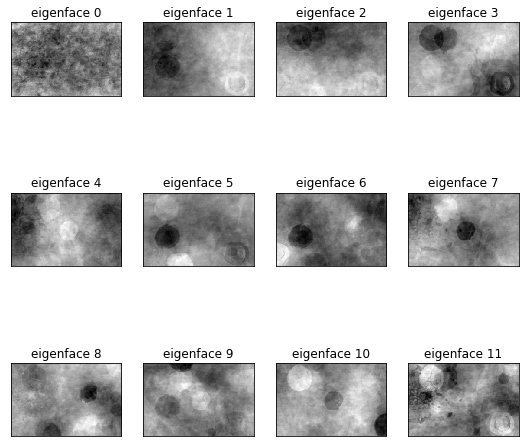

In [0]:
target_names=['HP-6']


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

#def title(y_pred, y_test, target_names, i):
#    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
#    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
#    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

#prediction_titles = [title(y_pred, y_test, target_names, i)
#                     for i in range(y_pred.shape[0])]

#plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

#plt.figure(figsize=(20,20))

plt.show()

#imshow(cropim[1], cmap='gray')


In [0]:
from sklearn.manifold import Isomap
model = Isomap(n_components=4)
proj = model.fit_transform(d2_imdat)
proj.shape

(2304, 4)

In [0]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

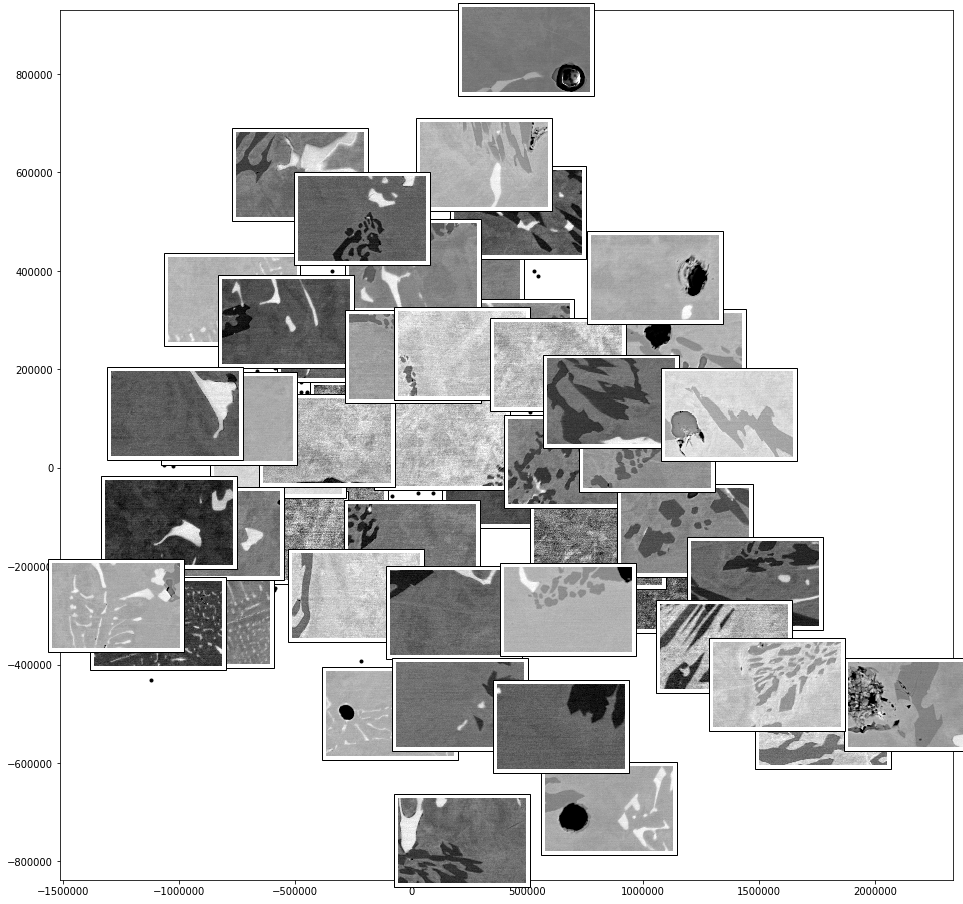

In [0]:
fig, ax = plt.subplots(figsize=(16, 16))
plot_components(d2_imdat,
                model=Isomap(n_components=2),
                images=imdat[:, ::2, ::2])

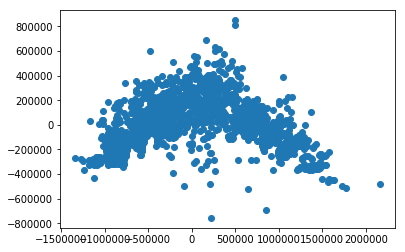

In [0]:
import sklearn
# use only 1/30 of the data: full dataset takes a long time!
#data = mnist.data[::30]
#target = mnist.target[::30].astype(int)

#model = Isomap(n_components=2)
#proj = model.fit_transform(data)
scaler = sklearn.preprocessing.MinMaxScaler()
plt.scatter(proj[:, 0], proj[:, 1], cmap=plt.cm.get_cmap('jet',10))
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5);

In [0]:
from sklearn.manifold import Isomap

# Choose 1/4 of the "1" digits to project
data = d2_imdat# mnist.data[mnist.target.astype(int) == 1][::4]

fig, ax = plt.subplots(figsize=(10, 10))
#model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 85, 128)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

ValueError: ignored

<Figure size 720x720 with 1 Axes>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)



Computing t-SNE embedding


NameError: ignored

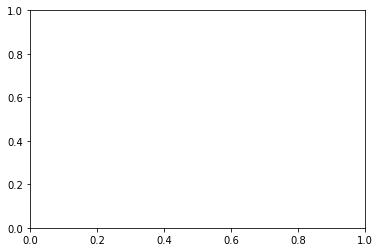

In [0]:
import numpy as np
from sklearn.manifold import TSNE
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(d2_imdat)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

In [0]:
import numpy as np

def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

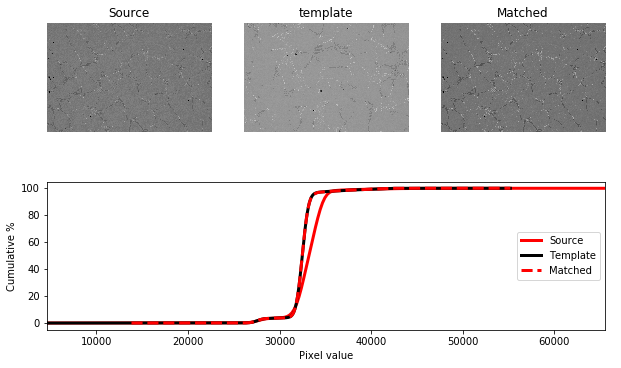

In [0]:
from matplotlib import pyplot as plt
#from scipy.misc import lena, ascent

source = cropim17[0]#lena()
template = cropim6[0]#ascent()
matched = hist_match(source, template)

def ecdf(x):
    """convenience function for computing the empirical CDF"""
    vals, counts = np.unique(x, return_counts=True)
    ecdf = np.cumsum(counts).astype(np.float64)
    ecdf /= ecdf[-1]
    return vals, ecdf

x1, y1 = ecdf(source.ravel())
x2, y2 = ecdf(template.ravel())
x3, y3 = ecdf(matched.ravel())

fig = plt.figure(figsize=(10,6))
gs = plt.GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs[1, :])
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source, cmap=plt.cm.gray)
ax1.set_title('Source')
ax2.imshow(template, cmap=plt.cm.gray)
ax2.set_title('template')
ax3.imshow(matched, cmap=plt.cm.gray)
ax3.set_title('Matched')

ax4.plot(x1, y1 * 100, '-r', lw=3, label='Source')
ax4.plot(x2, y2 * 100, '-k', lw=3, label='Template')
ax4.plot(x3, y3 * 100, '--r', lw=3, label='Matched')
ax4.set_xlim(x1[0], x1[-1])
ax4.set_xlabel('Pixel value')
ax4.set_ylabel('Cumulative %')
ax4.legend(loc=5)

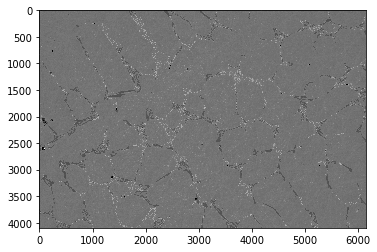

In [0]:
imshow(matched, cmap=plt.cm.gray)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


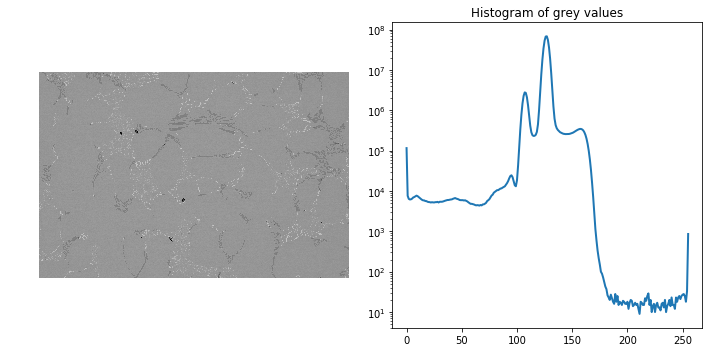

In [0]:
"""Aggregated Histogram of Dataset- BSE image contrast is related to atomic # of phases
save histogram datapoints to compare to other samples??"""
#plot Histogram

histim=cropim6
#histim = skimage.img_as_ubyte(cropim6) #8 bit

hist, hist_centers = histogram(histim) #aggregated histogram

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(cropim6[0], cmap=plt.cm.gray) #example image
ax[0].axis('off')

ax[1].semilogy(hist_centers, hist, lw=2)
ax[1].set_title('Histogram of grey values')

plt.tight_layout()


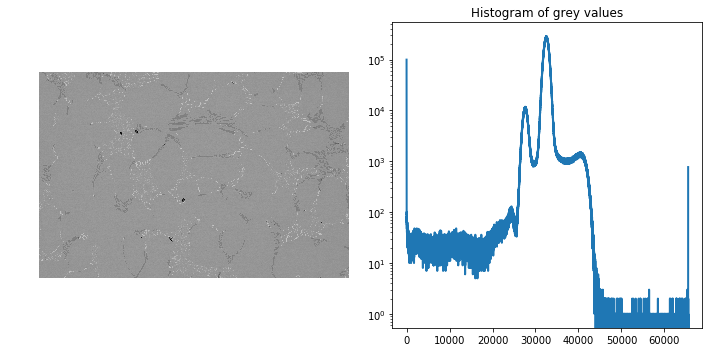

In [0]:
"""Aggregated Histogram of Dataset- BSE image contrast is related to atomic # of phases
save histogram datapoints to compare to other samples??"""
#plot Histogram

histim=cropim6
#histim = skimage.img_as_ubyte(cropim6) #8 bit

hist, hist_centers = histogram(histim) #aggregated histogram

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(cropim6[0], cmap=plt.cm.gray) #example image
ax[0].axis('off')

ax[1].semilogy(hist_centers, hist, lw=2)
ax[1].set_title('Histogram of grey values')

plt.tight_layout()


In [0]:
#Try NMF

ValueError: ignored

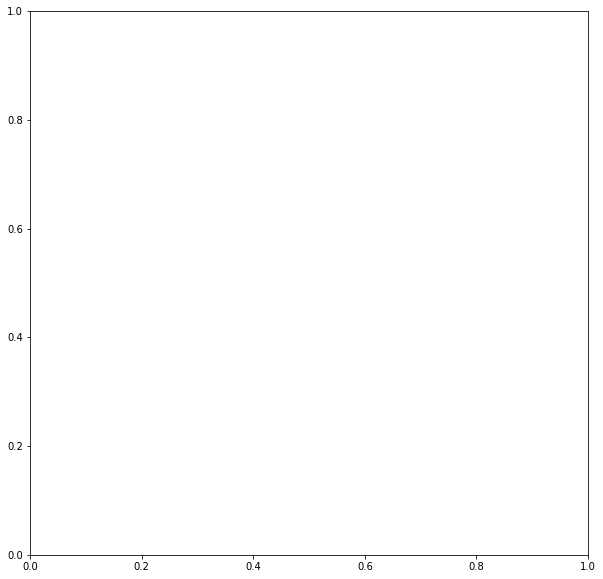

In [0]:
"""Visualize data"""
from sklearn.datasets import fetch_openml
from sklearn.manifold import Isomap
import sklearn
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)
#mnist = fetch_openml('mnist_784', version=1, cache=True)

#fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
#for i, axi in enumerate(ax.flat):
#    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

# use only 1/30 of the data: full dataset takes a long time!
data = cropim#.reshape(1536,1023.75)#mnist.data[::30]
#target = mnist.target[::30].astype(int)
#print(target)
#model = Isomap(n_components=2)
#proj = model.fit_transform(data)
#scaler = sklearn.preprocessing.MinMaxScaler()
#plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet',10))
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5);

from sklearn.manifold import Isomap

# Choose 1/4 of the "1" digits to project
#data = mnist.data[mnist.target.astype(int) == 1][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 6144, 4095)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')


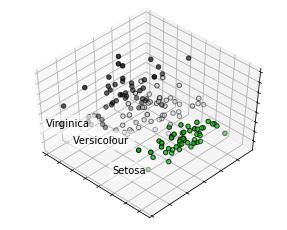

In [0]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


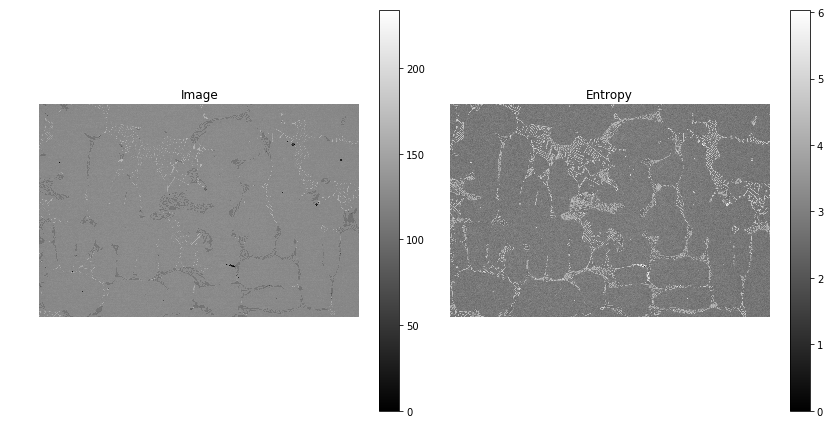

In [0]:
from skimage import data
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte
import skimage

entim=cropim[1] #what image to take entropy of

image = skimage.img_as_ubyte(entim) #8 bit
#image=cropim #16 bit=very slow

fig, ax = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)

fig.colorbar(ax[0].imshow(image, cmap=plt.cm.gray), ax=ax[0])
ax[0].set_title('Image')

fig.colorbar(ax[1].imshow(entropy(image, disk(5)), cmap=plt.cm.gray), ax=ax[1])
ax[1].set_title('Entropy')

for a in ax:
    a.axis('off')

plt.tight_layout()

(-0.5, 6143.5, 4094.5, -0.5)

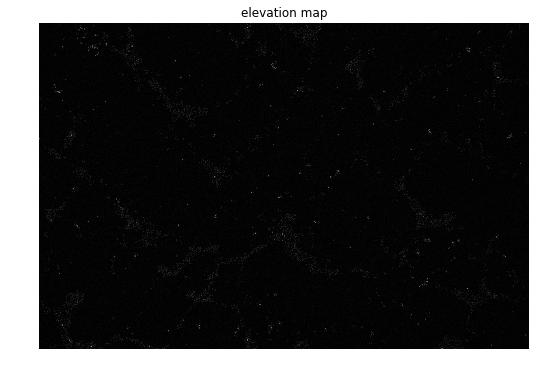

In [0]:
from scipy import ndimage
#Edge Detection
im=image

from skimage.filters import sobel

elevation_map = sobel(im)

fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('elevation map')
ax.axis('off')

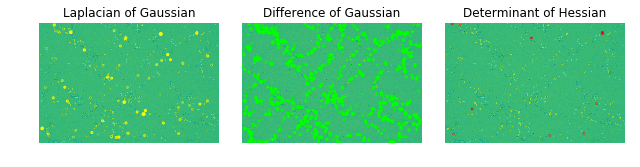

In [0]:
#Blob Detection
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image_gray = im

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

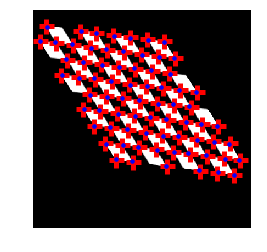

In [0]:
#Feature Detection- work in progress
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform


tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape=(350, 350))

coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

plt.gray()
plt.imshow(image, interpolation='nearest')
plt.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15, mew=5)
plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=7)
plt.axis('off')
plt.show()

In [0]:
"""Need Histogram matching"""
from skimage import data, img_as_float
from skimage import exposure

def histeq(im,nbr_bins=65536):

   #get image histogram
   imhist,bins = histogram(im.flatten(),nbr_bins)
   cdf = imhist.cumsum() #cumulative distribution function
   cdf = 65536 * cdf / cdf[-1] #normalize

   #use linear interpolation of cdf to find new pixel values
   im2 = interp(im.flatten(),bins[:-1],cdf)

   return im2.reshape(im.shape), cdf

#matchim6, cdf6 =histeq(cropim6)
#eqim6 = exposure.equalize_hist(cropim6)
